In [1]:
# fuzzy control system
# tipping problem
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

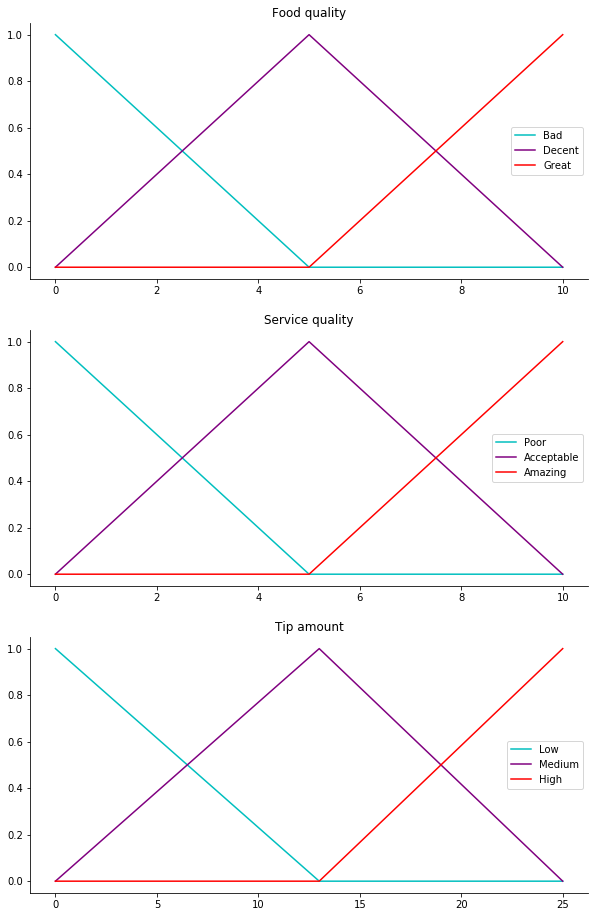

In [38]:
# universe
# arange [start, stop)
x_qual = np.arange(0, 11)
x_serv = np.arange(0, 11)
x_tip = np.arange(0, 26)

# membership
# trimf - trangular membership function
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])

serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])

tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

#  visualization
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 16))

ax0.plot(x_qual, qual_lo, 'c', linewidth=1.5, label="Bad")
ax0.plot(x_qual, qual_md, 'purple', linewidth=1.5, label="Decent")
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label="Great")
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'c', linewidth=1.5, label="Poor")
ax1.plot(x_serv, serv_md, 'purple', linewidth=1.5, label="Acceptable")
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label="Amazing")
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'c', linewidth=1.5, label="Low")
ax2.plot(x_tip, tip_md, 'purple', linewidth=1.5, label="Medium")
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label="High")
ax2.set_title('Tip amount')
ax2.legend()

# no need for top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
plt.tight_layout

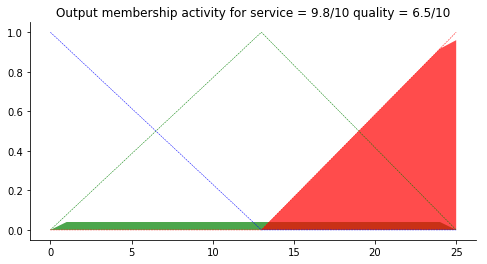

In [56]:
# rule base
quality = 6.5
service = 9.8

# interpolation for input data
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, quality)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, quality)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, quality)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, service)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, service)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, service)

# applying rule
# or rule -> mac
# should i give low tip?
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)
# should i give medium tip?
tip_activation_md = np.fmin(serv_level_md, tip_md)
# should i give high tip?
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# visualize this
fig, ax0 = plt.subplots(figsize=(8, 4))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity for service = {0}/10 quality = {1}/10'.format(service, quality))


ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)    

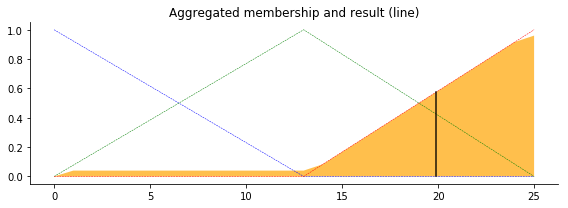

In [63]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()